# Tasks
#### Task 1
- 1α. Ποια χώρα ξοδεύει το μεγαλύτερο ποσοστό του ΑΕΠ της και σε ποια κατηγορία ανα χρόνο? 
- 1β. Ποιά χώρα ξοδεύει το περισσότερο και σε ποια κατηγορία σε απόλυτες τιμές ανα χρονο?

#### Task 2
- 2α. Ποια κατηγορία εχει τη μικρότερη δαπάνη στην ΕΕ σαν ποσοστό του ΑΕΠ συνολικά σε όλες τις χώρες? 
- 2β. Τι ποσοστό του ΑΕΠ ξοδεύει η χώρα με τη μεγαλύτερη δαπάνη σε αυτη τη κατηγορία και τι ποσοστό του αεπ ξοδεύει η χωρα με τη μικρότερη δαπάνη ? 
- 2γ. Ποιες χώρες είναι αυτες?

#### Task 3
- 3α. Ποια κατηγορία εχει δει τη μεγαλύτερη μείωση χρηματοδότησης σε απόλυτα νούμερα  σε ολες τις χωρες τις ΕΕ?
- 3β. Ποια κατηγορία έχει δει τη μεγαλύτερη? Ποια εχει μείνει ποιο σταθερη? 
- 3γ. Και δημιουργείστε γράφημα (line) που να κανει visualize τη μείωση των δαπανών σε αυτη τη κατηγορία

### Imports and relative Settings

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import warnings

# import dtale

from cleaner import cleaner
from COFOG_scraper import cofog_scrap

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

warnings.simplefilter("ignore")

### COFOG (Classification Of the Functions Of Government) Categories Structure

The **Classification of the functions of government**, abbreviated as **COFOG**, was developed in its current version in 1999 by the Organisation for Economic Co-operation and Development and published by the United Nations Statistical Division as a standard classifying the purposes of government activities.

COFOG consists of 10 **Divisions**, each of which containing Sub-Divisions, abbreviated as **Categories**.

The table **columns** bellow contain the 10 Divisions, and each **row** corresponds to a category of the division column they belong to.

In [2]:
pd.DataFrame(list(cofog_scrap().values()), index=cofog_scrap().keys()).T

,General public services,Defence,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,Health,"Recreation, culture and religion",Education,Social protection
0,"Executive and legislative organs, financial an...",Military defence,Police services,"General economic, commercial and labour affairs",Waste management,Housing development,"Medical products, appliances and equipment",Recreational and sporting services,Pre-primary and primary education,Sickness and disability
1,Foreign economic aid,Civil defence,Fire-protection services,"Agriculture, forestry, fishing and hunting",Waste water management,Community development,Outpatient services,Cultural services,Secondary education,Old age
2,General services,Foreign military aid,Law courts,Fuel and energy,Pollution abatement,Water supply,Hospital services,Broadcasting and publishing services,Post-secondary non-tertiary education,Survivors
3,Basic research,R&D defence,Prisons,"Mining, manufacturing and construction",Protection of biodiversity and landscape,Street lighting,Public health services,Religious and other community services,Tertiary education,Family and children
4,R&D general public services,Defence n.e.c.,R&D public order and safety,Transport,R&D environmental protection,R&D housing and community amenities,R&D health,"R&D recreation, culture and religion",Education not definable by level,Unemployment
5,General public services n.e.c.,None,Public order and safety n.e.c.,Communication,Environmental protection n.e.c.,Housing and community amenities n.e.c.,Health n.e.c.,"Recreation, culture and religion n.e.c.",Subsidiary services to education,Housing
6,Public debt transactions,None,None,Other industries,None,None,None,None,R&D education,Social exclusion n.e.c.
7,Transfers of a general character between diffe...,None,None,R&D economic affairs,None,None,None,None,Education n.e.c.,R&D social protection
8,None,None,None,Economic affairs n.e.c.,None,None,None,None,None,Social protection n.e.c.


### Loading and cleaning the data

In [3]:
# Relative path of the dataset
dataset_path = 'gov_10a_exp__custom_4037524_spreadsheet.xlsx'
gdp_path = 'nama_10_gdp__custom_4142114_spreadsheet.xlsx'

dataset = cleaner(dataset_path, gdp_path, remove_negative=True, cofog=True, save=False)
# dtale.show(dataset)

dataset

,Country,Year,Million euro,% GDP,Million GDP,Division,Category
0,Austria,2012,163191.9,51.213044,318653.0,total,total
1,Austria,2013,167292.1,51.647679,323910.2,total,total
2,Austria,2014,174671.6,52.430930,333146.1,total,total
3,Austria,2015,176030.0,51.131498,344269.2,total,total
4,Austria,2016,179059.0,50.071307,357608.0,total,total
...,...,...,...,...,...,...,...
25595,Switzerland,2017,55.1,0.008948,615776.3,social protection,social protection n.e.c.
25596,Switzerland,2018,53.7,0.008742,614304.4,social protection,social protection n.e.c.
25597,Switzerland,2019,56.1,0.008705,644443.2,social protection,social protection n.e.c.
25598,Switzerland,2020,59.3,0.009138,648913.3,social protection,social protection n.e.c.


### Task 1a: Countries with highest %GDP per year

In [4]:
dataset = dataset.dropna()

# Excluding 2021, since the data are still in a provisional state
dataset_filtered = dataset.loc[(dataset['Country'] != 'European Union') & 
                               (dataset['Country'] != 'Eurozone') & 
                               (dataset['Category'] != 'total') &
                               (dataset['Year'] != '2021')]

dataset_filtered.loc[dataset_filtered.groupby(['Year'])['% GDP'].idxmax()].reset_index(drop=True)

,Country,Year,Million euro,% GDP,Million GDP,Division,Category
0,Denmark,2012,62576.4,24.580443,254578.0,social protection,social protection
1,Finland,2013,50262.0,24.599527,204321.0,social protection,social protection
2,Finland,2014,52184.0,25.222212,206897.0,social protection,social protection
3,Finland,2015,53413.0,25.268113,211385.0,social protection,social protection
4,Finland,2016,55426.0,25.481110,217518.0,social protection,social protection
5,Finland,2017,55546.0,24.545185,226301.0,social protection,social protection
6,Finland,2018,56618.0,24.251484,233462.0,social protection,social protection
7,Finland,2019,57720.0,24.064238,239858.0,social protection,social protection
8,France,2020,627916.0,27.176993,2310469.0,social protection,social protection


In [5]:
_ = dataset_filtered.loc[(dataset['Division'] == 'social protection') & 
                         (dataset['Category'] != 'social protection')]

_.loc[_.groupby(['Year'])['% GDP'].idxmax()].reset_index(drop=True)

,Country,Year,Million euro,% GDP,Million GDP,Division,Category
0,Greece,2012,30159.0,16.009610,188380.6,social protection,old age
1,Greece,2013,26634.0,14.806176,179884.4,social protection,old age
2,Greece,2014,27280.0,15.391907,177236.0,social protection,old age
3,Greece,2015,27657.0,15.681336,176368.9,social protection,old age
4,Greece,2016,27777.0,15.918581,174494.2,social protection,old age
5,Greece,2017,24844.0,14.043823,176903.4,social protection,old age
6,Greece,2018,24754.0,13.786098,179557.7,social protection,old age
7,Greece,2019,25389.0,13.847196,183351.2,social protection,old age
8,Greece,2020,25994.0,15.715280,165405.9,social protection,old age


### Task 1b: Countries with highest Million euro per year

In [6]:
dataset_filtered.loc[dataset_filtered.groupby(['Year'])['Million euro'].idxmax()].reset_index(drop=True)

,Country,Year,Million euro,% GDP,Million GDP,Division,Category
0,Germany,2012,518918.0,18.901982,2745310.0,social protection,social protection
1,Germany,2013,533910.0,18.991232,2811350.0,social protection,social protection
2,Germany,2014,550151.0,18.792969,2927430.0,social protection,social protection
3,Germany,2015,577822.0,19.094105,3026180.0,social protection,social protection
4,Germany,2016,611468.0,19.506179,3134740.0,social protection,social protection
5,Germany,2017,634997.0,19.435748,3267160.0,social protection,social protection
6,Germany,2018,648812.0,19.278611,3365450.0,social protection,social protection
7,Germany,2019,681481.0,19.620789,3473260.0,social protection,social protection
8,Germany,2020,734813.0,21.577686,3405430.0,social protection,social protection


In [7]:
_ = dataset_filtered.loc[(dataset['Division'] == 'social protection') & 
                         (dataset['Category'] != 'social protection')]

_.loc[_.groupby(['Year'])['Million euro'].idxmax()].reset_index(drop=True)

,Country,Year,Million euro,% GDP,Million GDP,Division,Category
0,France,2012,277646.0,13.292104,2088804.0,social protection,old age
1,France,2013,285321.0,13.476407,2117189.0,social protection,old age
2,France,2014,291652.0,13.566692,2149765.0,social protection,old age
3,France,2015,296442.0,13.484247,2198432.0,social protection,old age
4,France,2016,301192.0,13.481406,2234129.0,social protection,old age
5,Germany,2017,306312.0,9.375482,3267160.0,social protection,old age
6,Germany,2018,316284.0,9.397971,3365450.0,social protection,old age
7,Germany,2019,333161.0,9.592170,3473260.0,social protection,old age
8,Germany,2020,347763.0,10.212014,3405430.0,social protection,old age


### Task 2a: Category with least %GDP spent across all countries

In [8]:
# Grouping the data by category and summing the category entries - sorting values from low to high
categories = dataset_filtered.groupby('Category')['% GDP'].sum().sort_values(ascending = True).to_frame(name = '% GDP Sum')
categories = categories.reset_index().head(10)

categories

,Category,% GDP Sum
0,transfers of a general character between diffe...,0.241892
1,r&d public order and safety,1.128644
2,r&d housing and community amenities,1.219651
3,r&d social protection,1.660851
4,r&d defence,2.793877
5,civil defence,4.525185
6,"r&d recreation, culture and religion",5.028726
7,r&d environmental protection,6.235520
8,post-secondary non-tertiary education,8.273064
9,foreign military aid,8.891712


### Task 2b & 2c: Average of the highest and lowest spending country for the lowest %GDP category

In [9]:
# Extracting the category name of the lowest entry (first entry)
lowest_gdp_category = categories['Category'].iloc[0]

# Grouping the data by country name, based on the entries under the extracted category name and calculating the mean.
mean_gdp = dataset_filtered.loc[dataset_filtered['Category'] == lowest_gdp_category].groupby('Country')['% GDP'].mean() \
.sort_values(ascending = False).to_frame(name = 'mean %GDP')

# Filtering out the entries with value 0
mean_gdp = mean_gdp.loc[mean_gdp['mean %GDP'] != 0]

# Finding the min and max values
max_gdp = mean_gdp[mean_gdp['mean %GDP'] == mean_gdp['mean %GDP'].max()]
min_gdp = mean_gdp[mean_gdp['mean %GDP'] == mean_gdp['mean %GDP'].min()]

print(f'Countries with the MAX and MIN amount of mean %GDP in the category of:\n"{lowest_gdp_category}"')
display(max_gdp, min_gdp)

Countries with the MAX and MIN amount of mean %GDP in the category of:
"transfers of a general character between different levels of government"


,mean %GDP
Country,
Austria,0.026784


,mean %GDP
Country,
Belgium,0.000093


### Task 3: Calculating the increase / decrease of Million euro spent for each category across all countries each year

In [10]:
# Increase or Decrease of expenditure in Million euro of each category compared to the previous year
_ = dataset_filtered.groupby(['Category', 'Year'])['Million euro'].sum().to_frame(name = 'Million euro Sum').reset_index()
_['Million euro Difference'] = _.groupby(['Category'])['Million euro Sum'].diff()

category_difference = _.reset_index()

# Summing the difference to show the category expenditure
# Positive difference = Increase in expenditure
# Negative difference = Decrease in expenditure
_ = category_difference.groupby(['Category'])['Million euro Difference'].sum()\
    .sort_values(ascending = False).to_frame(name = 'Million euro Difference')

_
# category_difference

,Million euro Difference
Category,
social protection,731966.3
old age,336038.5
economic affairs,279703.3
health,275620.6
education,124727.2
...,...
general public services n.e.c.,-1003.3
housing development,-1899.8
communication,-3118.4


In [11]:
highest_increase = _[_['Million euro Difference'] == _['Million euro Difference'].max()]
highest_decrease = _[_['Million euro Difference'] == _['Million euro Difference'].min()]

In [12]:
_['Difference to 0'] = 0 - _['Million euro Difference'].abs()
_.sort_values(by=['Difference to 0'], ascending=False)

most_stable = _[_['Difference to 0'] == _['Difference to 0'].max()]
most_stable.drop('Difference to 0', axis=1, inplace=True)

display(highest_increase, highest_decrease, most_stable)

,Million euro Difference
Category,
social protection,731966.3


,Million euro Difference
Category,
public debt transactions,-144602.2


,Million euro Difference
Category,
defence n.e.c.,22.2


In [13]:
highest_decrease_index = highest_decrease.reset_index()
highest_decrease_category = highest_decrease_index['Category'].iloc[0]

_ = category_difference.loc[category_difference['Category'] == highest_decrease_category]

<AxesSubplot:title={'center':'Millions of euro spent across all countries in: public debt transactions'}, xlabel='Year'>

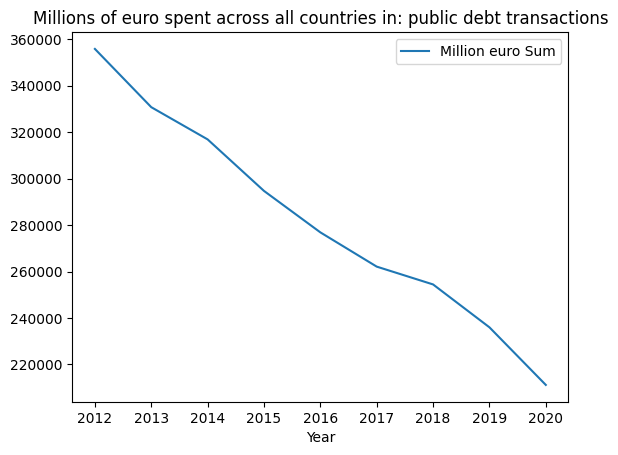

In [14]:
_.plot.line(x='Year', y='Million euro Sum', title=f'Millions of euro spent across all countries in: {highest_decrease_category}')

# Notes:
* pandas groupby continuous values visualization
* COFOG Description link: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=132464&CVD=132465&CPV=7&CST=01011960&CLV=1&MLV=4&adm=0&dis=0

# TO-DO:
* Check Task 3 for the 10 Divisions, instead of all 79. THEN check for each Division's Categories